In [1]:
import pandas as pd
import numpy as np

In [2]:
import math

In [3]:
import kagglehub

In [4]:
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")

In [5]:
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Tudor\.cache\kagglehub\datasets\jayaantanaath\student-habits-vs-academic-performance\versions\1


In [6]:
df = pd.read_csv('student_habits_performance.csv')

### Cleaning NaN Data

In [7]:
df.loc[
    df['parental_education_level'].isna(),
    'parental_education_level'
] = 'Not Known'

In [8]:
df['diet_quality'].value_counts()

diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64

### Conversions

In [9]:
df_int = df.copy()

In [10]:
# Converting diet_quality rankings to integers
df_int['diet_quality'] = df_int['diet_quality'].apply(lambda x: 0 if x == 'Poor' else (1 if x == 'Fair' else 2))

In [11]:
# Converting parental_education rankings to integers
df_int['parental_education_level'] = df_int['parental_education_level'].apply(lambda x: 0 if x == 'High School' else (
    1 if x == 'Bachelor' else (
        2 if x == 'Master' else -1
    )
))

In [12]:
# Converting internet_quality rankings to integers
df_int['internet_quality'] = df_int['internet_quality'].apply(lambda x: 0 if x == 'Poor' else (
    1 if x == 'Average' else 2
))

In [13]:
# Converting extracurricular_participation Yes/No to True/False
df_int['extracurricular_participation'] = df_int['extracurricular_participation'].apply(lambda x: True if x == 'Yes' else False)

In [14]:
# Converting part_time_job Yes/No to True/False
df_int['part_time_job'] = df_int['part_time_job'].apply(lambda x: True if x == 'Yes' else False)

### Saving

In [15]:
df_int.to_csv('student_habits_performance_changed.csv', index=False)

### Plotting

In [16]:
import matplotlib.pyplot as plt

In [17]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [18]:
df['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Not Known       91
Name: count, dtype: int64

In [19]:
df_int['exercise_frequency'].value_counts()

exercise_frequency
3    153
6    152
5    149
1    146
0    144
4    134
2    122
Name: count, dtype: int64

<Axes: title={'center': 'Scatter Plot By Extracurricular Participation'}, xlabel='study_hours_per_day', ylabel='exam_score'>

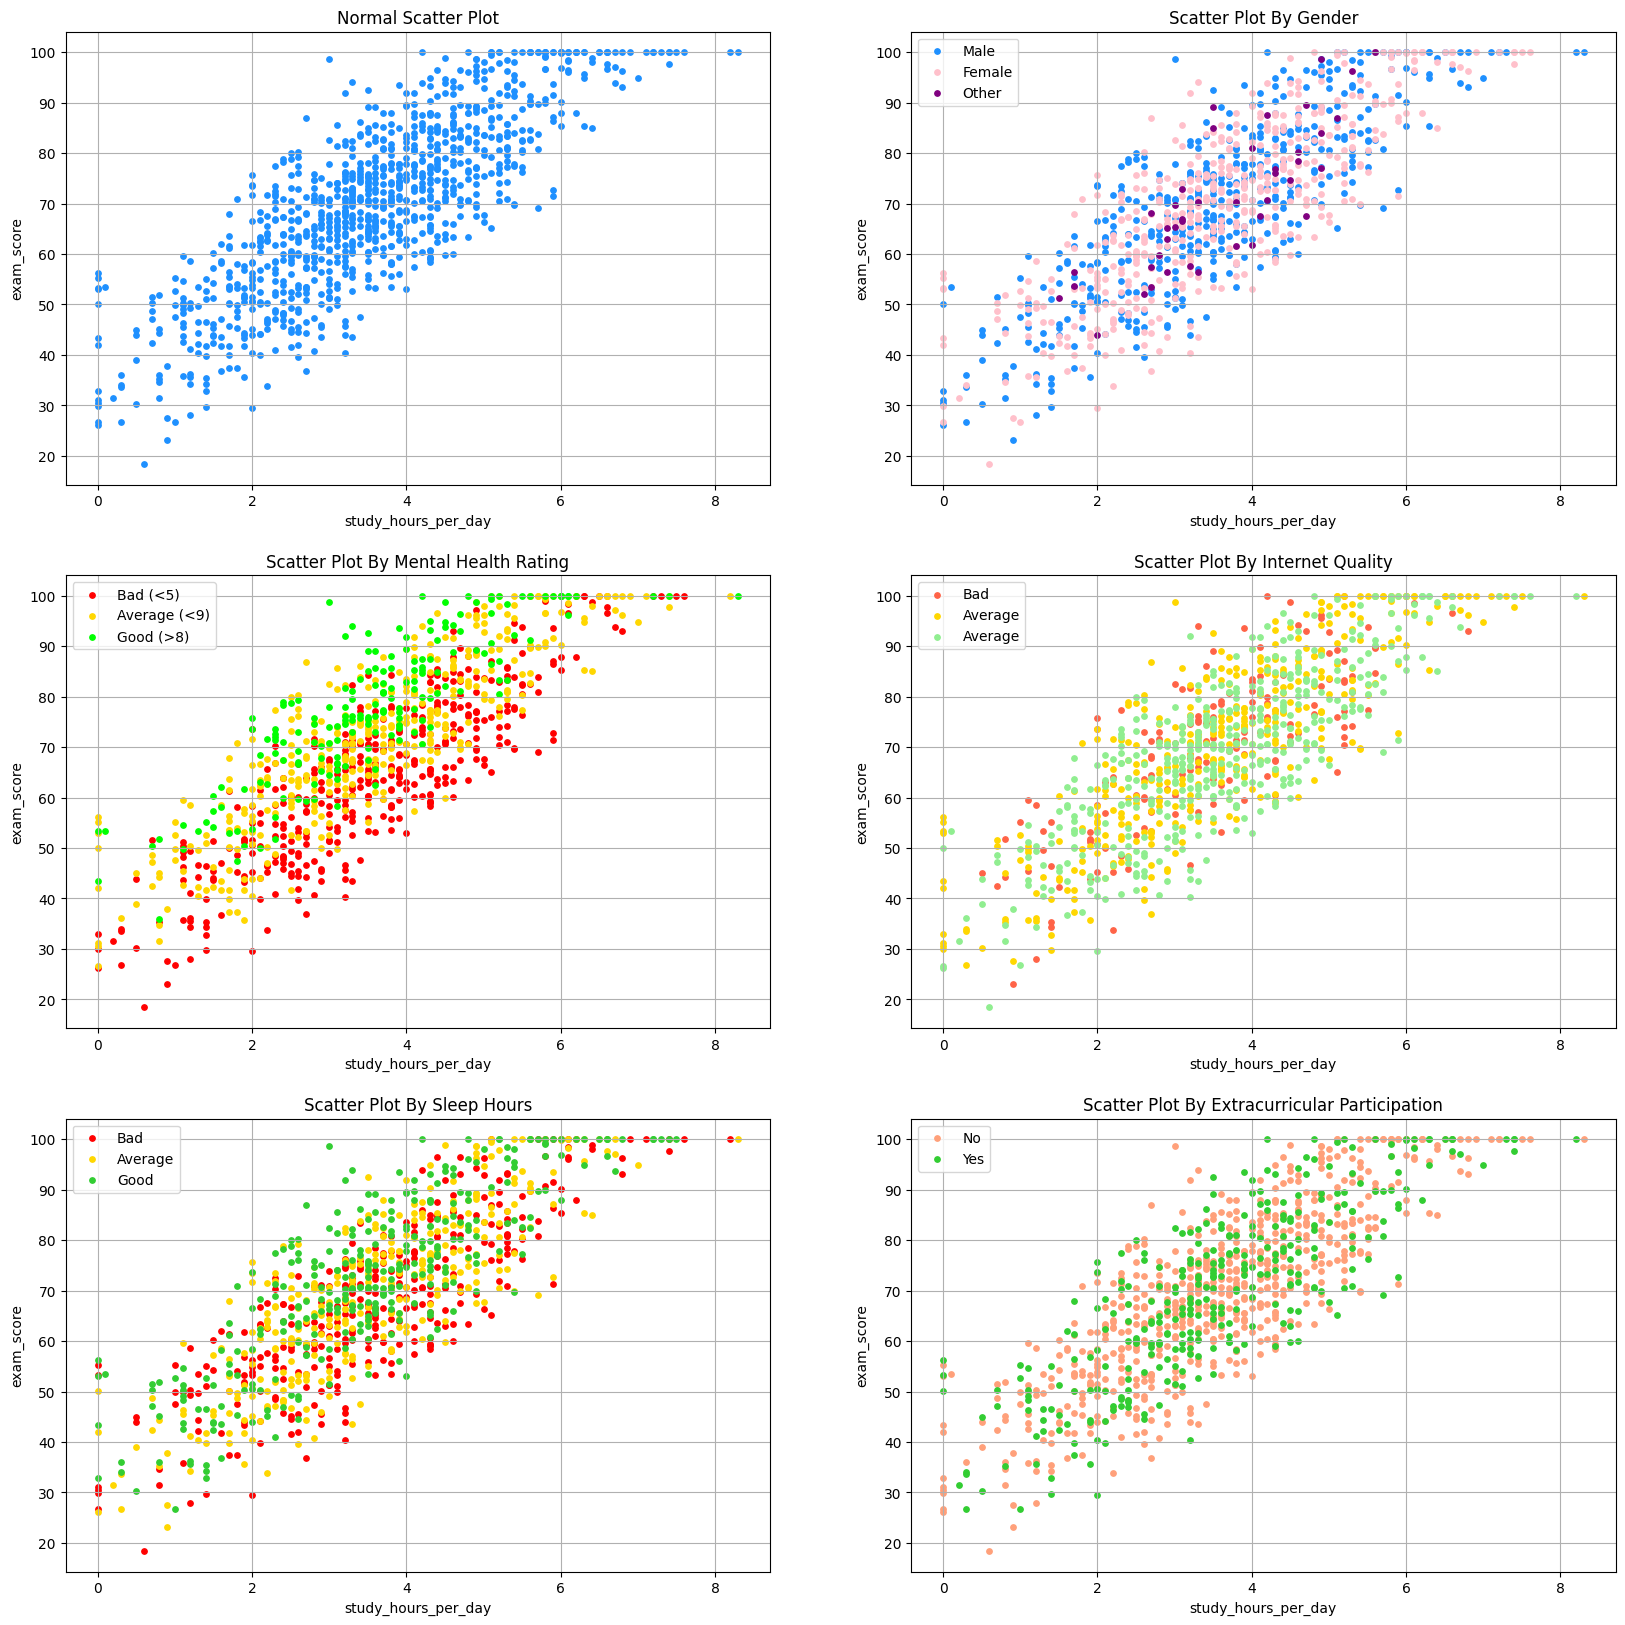

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (20, 20))
axes = axes.flatten()
S = 15
df_int.plot.scatter(x='study_hours_per_day', y='exam_score', title='Normal Scatter Plot', ax=axes[0],
                   xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
                   color='dodgerblue', s=S)

### Plotting By Gender

df_int.loc[
    df['gender']=='Male'
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Gender', ax=axes[1],
              xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='dodgerblue', s=S, label='Male')
df_int.loc[
    df['gender']=='Female'
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Gender', ax=axes[1],
              xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='pink', s=S, label='Female')
df_int.loc[
    df['gender']=='Other'
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Gender', ax=axes[1],
              xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='purple', s=S, label='Other')

### Plotting By Gender
df_int.loc[
    df['mental_health_rating'] <= 4
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Mental Health Rating', 
              ax=axes[2], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='red', s=S, label='Bad (<5)')
df_int.loc[
    df['mental_health_rating'].between(5, 8)
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Mental Health Rating', 
              ax=axes[2], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='gold', s=S, label='Average (<9)')
df_int.loc[
    df['mental_health_rating'] > 8
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Mental Health Rating', 
              ax=axes[2], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='lime', s=S, label='Good (>8)')

### Plotting By Internet Quality
df_int.loc[
    df_int['internet_quality'] == 0
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Internet Quality', 
              ax=axes[3], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='tomato', s=S, label='Bad')
df_int.loc[
    df_int['internet_quality'] == 1
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Internet Quality', 
              ax=axes[3], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='gold', s=S, label='Average')
df_int.loc[
    df_int['internet_quality'] == 2
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Internet Quality', 
              ax=axes[3], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='lightgreen', s=S, label='Average')

### Plotting By Sleep Hours
df_int.loc[
    df_int['sleep_hours'] < 6
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Sleep Hours', 
              ax=axes[4], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='red', s=S, label='Bad')
df_int.loc[
    df_int['sleep_hours'].between(6, 7)
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Sleep Hours', 
              ax=axes[4], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='gold', s=S, label='Average')
df_int.loc[
    df_int['sleep_hours'] > 7
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Sleep Hours', 
              ax=axes[4], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='limegreen', s=S, label='Good')

### Plotting by Extracurricular Participation
df_int.loc[
    df_int['extracurricular_participation'] == False
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Extracurricular Participation', 
              ax=axes[5], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='lightsalmon', s=S, label='No')
df_int.loc[
    df_int['extracurricular_participation'] == True
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Plot By Extracurricular Participation', 
              ax=axes[5], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='limegreen', s=S, label='Yes')

<Axes: title={'center': 'Exercise Frequency'}, xlabel='study_hours_per_day', ylabel='exam_score'>

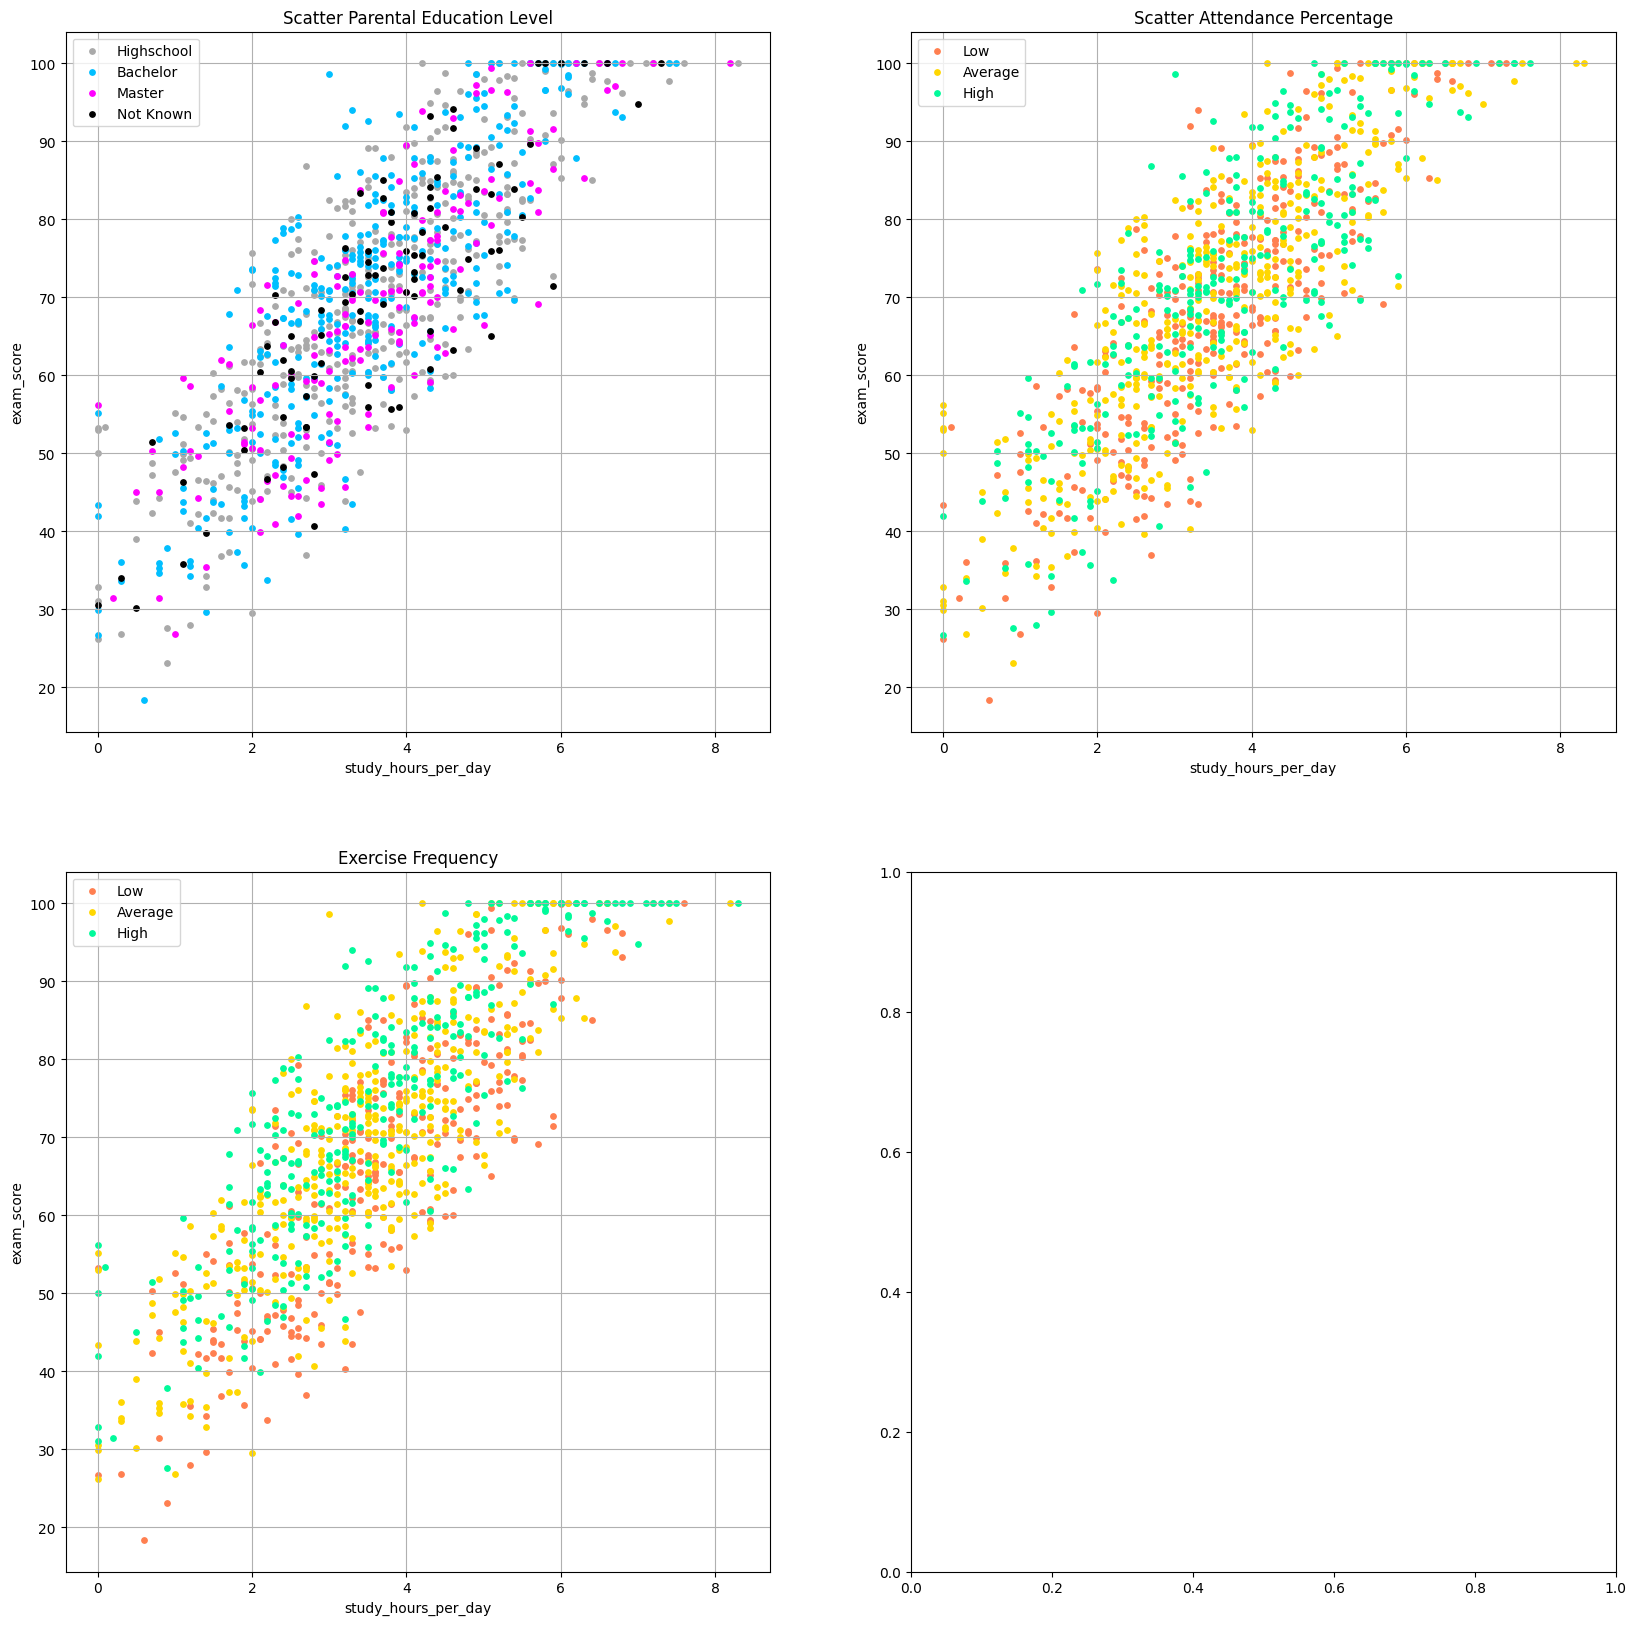

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20, 20))
axes = axes.flatten()

### Plotting by Parental Education Level
df_int.loc[
    df_int['parental_education_level'] == 0
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Parental Education Level', 
              ax=axes[0], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='darkgrey', s=S, label='Highschool')
df_int.loc[
    df_int['parental_education_level'] == 1
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Parental Education Level', 
              ax=axes[0], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='deepskyblue', s=S, label='Bachelor')
df_int.loc[
    df_int['parental_education_level'] == 2
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Parental Education Level', 
              ax=axes[0], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='magenta', s=S, label='Master')
df_int.loc[
    df_int['parental_education_level'] == -1
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Parental Education Level', 
              ax=axes[0], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='black', s=S, label='Not Known')

### Plotting by Attendance Percentage
df_int.loc[
    df_int['attendance_percentage'] < 80.0 
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Attendance Percentage', 
              ax=axes[1], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='coral', s=S, label='Low')
df_int.loc[
    df_int['attendance_percentage'].between(80, 90)
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Attendance Percentage', 
              ax=axes[1], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='gold', s=S, label='Average')
df_int.loc[
    df_int['attendance_percentage'] > 90
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Scatter Attendance Percentage', 
              ax=axes[1], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='mediumspringgreen', s=S, label='High')

### Plotting by Exercise Frequency
df_int.loc[
    df_int['exercise_frequency'] < 2 
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Exercise Frequency', 
              ax=axes[2], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='coral', s=S, label='Low')
df_int.loc[
    df_int['exercise_frequency'].between(2, 4)
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Exercise Frequency', 
              ax=axes[2], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='gold', s=S, label='Average')
df_int.loc[
    df_int['exercise_frequency'] > 4
].plot.scatter(x='study_hours_per_day', y='exam_score', title='Exercise Frequency', 
              ax=axes[2], xlabel='study_hours_per_day', ylabel='exam_score', grid=True,
              color='mediumspringgreen', s=S, label='High')

In [22]:
# df_int.plot(x='age', y='study_hours_per_day', title='Line Plot')

<Axes: title={'center': 'Mental Health Rating Plot'}, xlabel='mental_health_rating'>

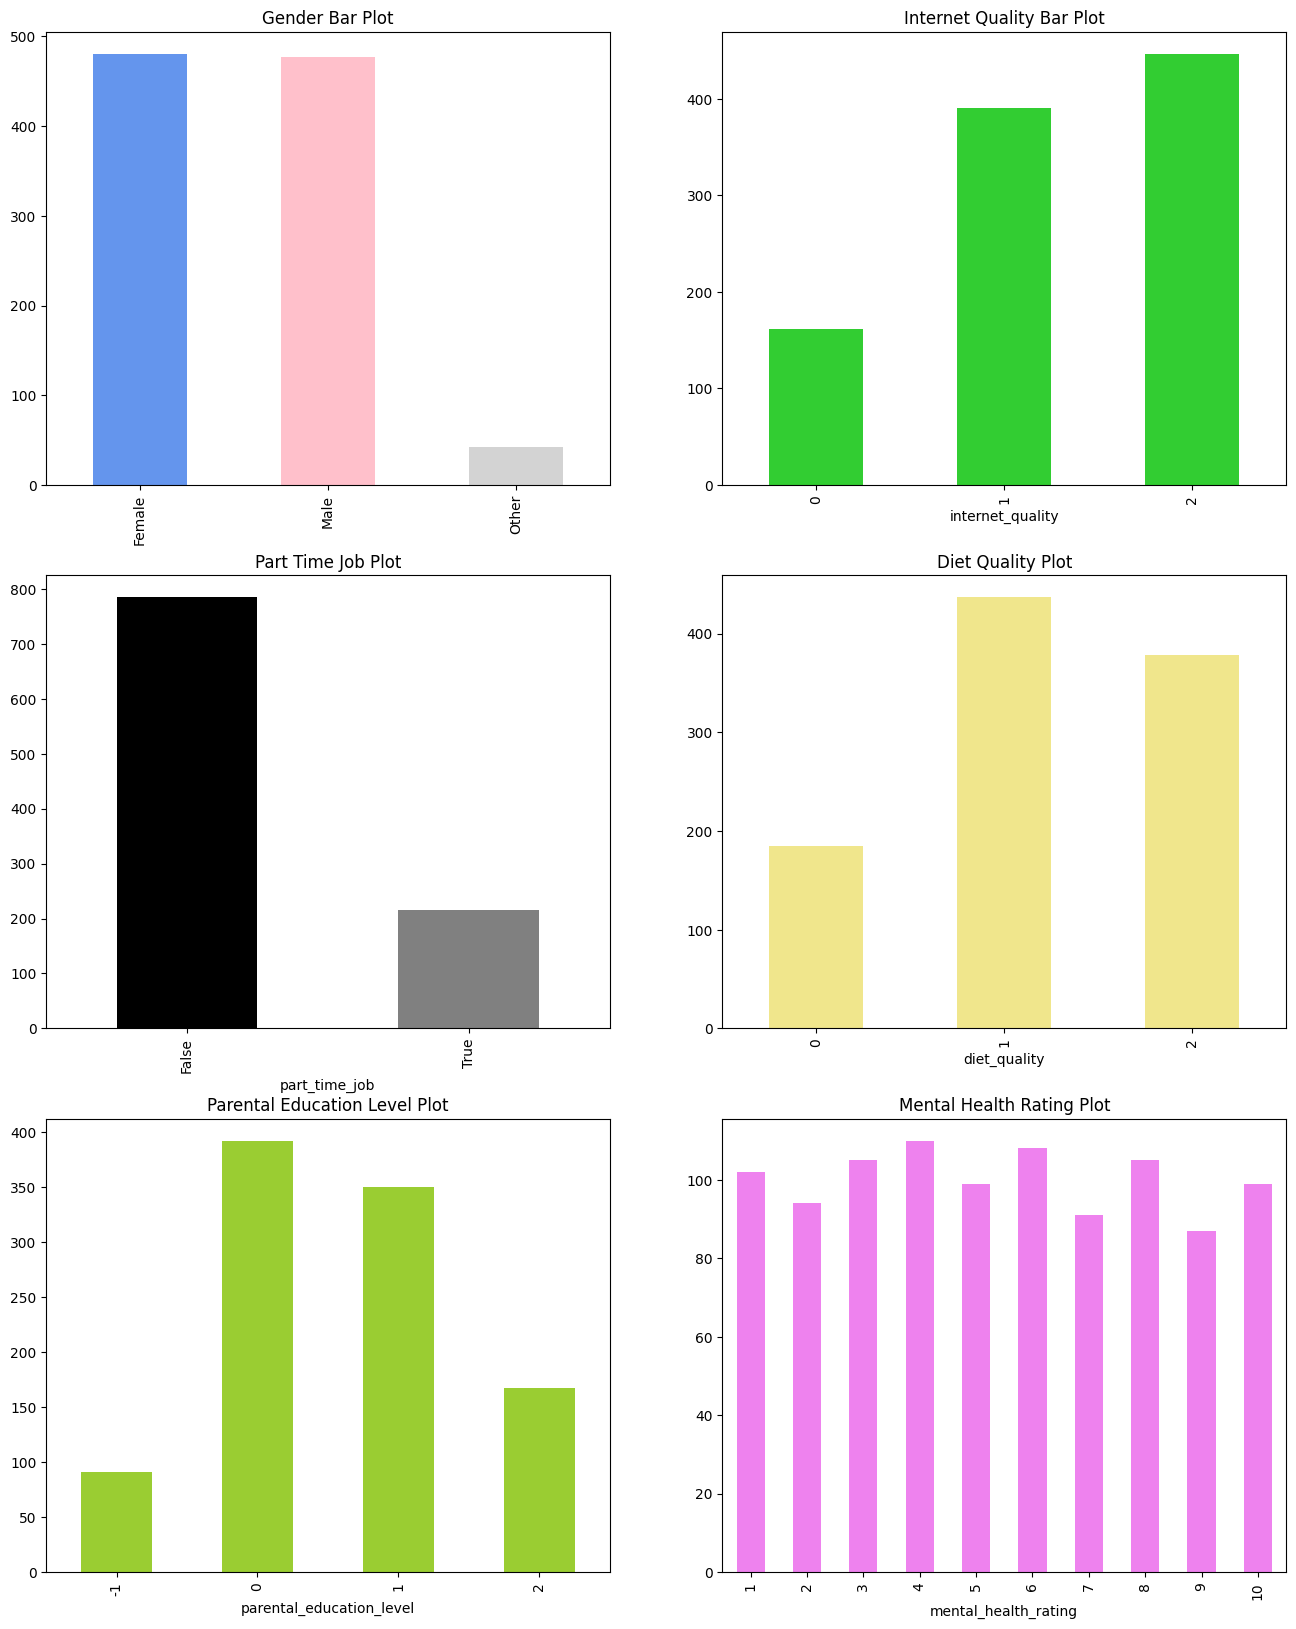

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (16, 20))
axes = axes.flatten()
df_int.groupby('gender')['gender'].size().plot(title='Gender Bar Plot', kind='bar', ax=axes[0], 
                                               color=['cornflowerblue', 'pink', 'lightgray'], xlabel='')
df_int.groupby('internet_quality')['internet_quality'].size().plot(title='Internet Quality Bar Plot',
                                                                   kind='bar', ax=axes[1],
                                                                   color='limegreen')
df_int.groupby('part_time_job')['part_time_job'].size().plot(title='Part Time Job Plot', kind='bar',
                                                            ax=axes[2], color=['black', 'gray'])
df_int.groupby('diet_quality')['diet_quality'].size().plot(title='Diet Quality Plot', kind='bar',
                                                            ax=axes[3], color='khaki')
df_int.groupby('parental_education_level')['parental_education_level'].size().plot(
    title='Parental Education Level Plot', kind='bar',
    ax=axes[4], color='yellowgreen')
df_int.groupby('mental_health_rating')['mental_health_rating'].size().plot(
    title='Mental Health Rating Plot', kind='bar', ax=axes[5], color='violet'
)

<Axes: title={'center': 'Histogram of exam score'}, xlabel='score', ylabel='Frequency'>

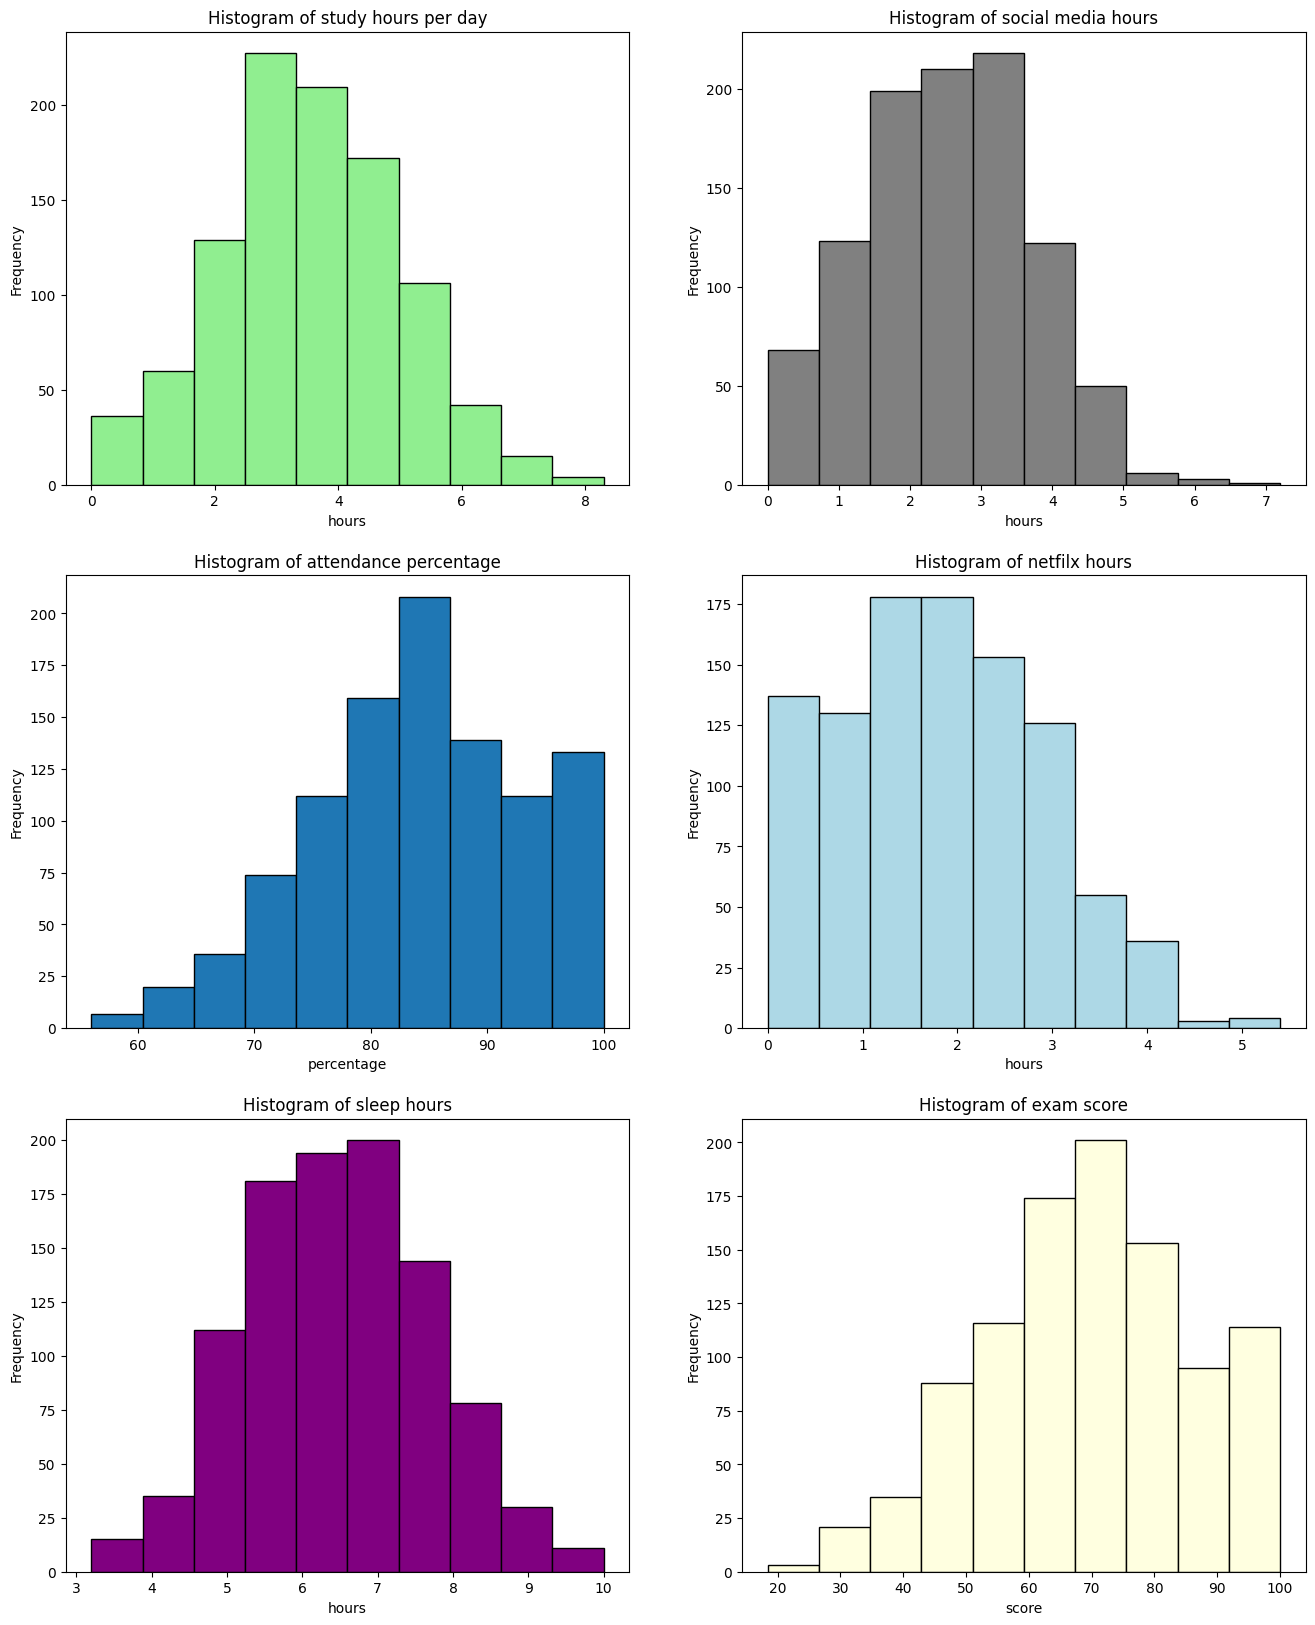

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (16, 20))
axes = axes.flatten()
df_int['study_hours_per_day'].plot(kind='hist', ax=axes[0], color='lightgreen',
                                   title='Histogram of study hours per day', edgecolor='black', xlabel='hours')
df_int['social_media_hours'].plot(kind='hist', ax=axes[1], color='gray',
                                  title='Histogram of social media hours', edgecolor='black', xlabel='hours')
df_int['attendance_percentage'].plot(kind='hist', ax=axes[2], title='Histogram of attendance percentage', edgecolor='black', xlabel='percentage')
df_int['netflix_hours'].plot(kind='hist', ax=axes[3], color='lightblue',
                             title='Histogram of netfilx hours', edgecolor='black', xlabel='hours')
df_int['sleep_hours'].plot(kind='hist', ax=axes[4], color='purple',
                           title='Histogram of sleep hours', edgecolor='black', xlabel='hours')
df_int['exam_score'].plot(kind='hist', ax=axes[5], color='lightyellow',
                          title='Histogram of exam score', edgecolor='black', xlabel='score')
